<a href="https://colab.research.google.com/github/Kiko-exe/Environmental-physics/blob/main/ray_tracing_lab_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# e316: Seismic Ray Tracing

In this lab, we will explore how seismic ray tracing can be used to model the propagation of seismic energy through the earth. Using ray tracing, we will estimate the epicentral distance and origin time for an earthquake.

Chapter 11 of [A Guided Tour of Mathematical Methods for the Physical Sciences](http://www.cambridge.org/nz/academic/subjects/physics/mathematical-methods/guided-tour-mathematical-methods-physical-sciences-3rd-edition#W7jZxE54KWWuUWEC.97), *Scale Analysis*, discusses the conditions where waves can be considered in terms of ray theory. This is not a bad approximation when the spatial variability in the physical parameters that define the wave propagation is large compared to the propagating wavelengths. In that case, the wave equation, can be reduced to the Eikonal equation, which describes the travel time $T$ of a seismic ray in a medium with wave speed $v({\bf r})$ as $$ |\nabla T({\bf r})|^2 = 1/v({\bf r})^2.$$ In our book you can read how to derive [Snell's Law](https://en.wikipedia.org/wiki/Snell%27s_law) from the Eikonal equation, for example.

There are many strategies under the umbrella of "ray tracing" to find the travel time of rays in media with arbitrary velocity distributions, but here we will explore the travel time and ray path of seismic waves in a spherically symmetric approximation of Earth.

### **Rays in a spherically symmetric Earth**
Having accepted ray theory in the Earth for high-frequency seismic waves, we can estimate the travel time $T$ and epicentral distance $\Delta$ of "seismic rays." To first order, the Earth is spherically symmetric, greatly simplifying ray propagation. In a spherically symmetric Earth, the 3D velocity distribution reduces to a 1D model: $v({\bf r})= v(r)$:

![Figure 1](https://auckland.figshare.com/ndownloader/files/14738099)

First, a small part of the ray path $ds$ satisfies Pythagoras' Rule: $ds^2 = dr^2 + (rd\Delta)^2$. Second, the take-off angle $i$ is the angle of the ray with the normal to the Earth's surface. A triangle shows that $\sin(i) = rd\Delta/ds$  Thirdly, Snell's Law in a spherically symmetric Earth is $r\sin (i) /v(r)=p$. This constant $p$ is called the ray parameter.

#### **Question 1**
Combining these three expressions, show that

$$ \frac{ds}{dr} = \frac{r}{\sqrt{r^2-(pv)^2}} \ \ \ \ \ \mbox{and}   \ \ \ \ \ \ \frac{d\Delta}{dr} = \frac{pv/r}{\sqrt{r^2-(pv)^2}}.$$
### **Time and distance of a ray**
To find the total ray path length $s$ and the epicentral distance $\Delta$ traveled by the ray, we integrate these expressions with regards to $r$.


Let's consider a ray that starts and ends at the surface, and travels an epicentral distance $\Delta$:
![Figure 2](https://auckland.figshare.com/ndownloader/files/14754827)

Then, we take advantage of the symmetry, by integrating twice from the point of maximum depth of the ray $r=r_0$ to the surface $r= R$:
$$
\Delta(p) = 2 \int_{r_0}^R \frac{pv/r} {\sqrt{r^2-(pv)^2}}dr.
$$

The travel time requires integration of $\frac{1}{v}\frac{ds}{dr}$ over $r$, so that:
$$
T(p) = 2 \int_{r_0}^R \frac{r/v} {\sqrt{r^2-(pv)^2}}dr.
$$
These equations could have also been derived directly from the Eikonal equation and the equation of kinematic ray tracing (see Aki and Richards, for example).


### **Rays in a sphere with constant speed**
In his book *Principles of Seismology*, Udias derives expressions for travel time and epicentral distance from source to receiver for the special case of a sphere with radius $R$ and a constant speed: $v(r) =c$. In this simplest of cases, the rays don't bend:

![Figure 3](https://auckland.figshare.com/ndownloader/files/14777435)

The travel time for these rays with ray parameter $p$ is
$$
T(p) = \frac{2}{c}\sqrt{R^2-p^2c^2},
$$
and the epicentral distance is
$$
\Delta(p) = 2\cos^{-1}\left(\frac{pc}{R}\right).
$$

####  **Question 2**
If you are a real buff in solving integrals analytically, you can set $v(r) = c$ and solve the integrals for $T$ and $\Delta$ from earlier in this notebook, but they are not easy! Instead, convince yourself of Udias' results by differentiating the expressions for $T$ and $\Delta$ with respect to $R=r$ to confirm the integrands for the general expressions of $T(p)$ and $\Delta(p)$ stated earlier.

### Comparing analytic with numerical solutions

We can now compare the analytic solution and the integral solution with a numerical approximation.
The code cell below calculates and plots the analytic and numerical expression for the travel time as a function of take-off angle.

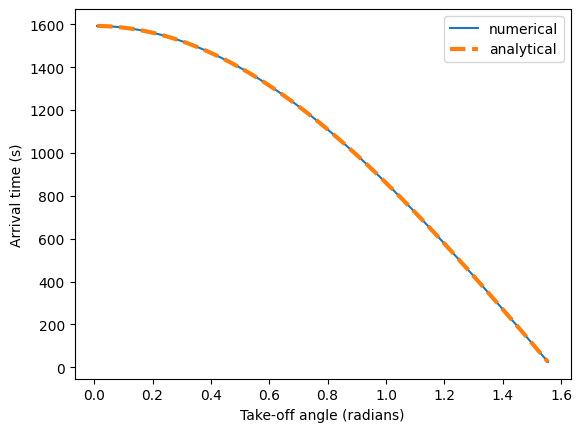

In [ ]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook # comment this line out if you are using Colab, because it would not work.

# Set the wavespeed and radius of the sphere:
c = 8 # in km/s
R = 6371 # radius in km

# Function defining the integrand for travel time:
def T_integrand(r, c, p):
    return (2*r/c)/np.sqrt(r**2-(c*p)**2)

# We define a range of incidence angles/slash ray parameters:
angles = np.linspace(0.01,0.99*np.pi/2,100) # (almost) all angles, just avoiding some singularities
ps = R*np.sin(angles)/c

# the analytic travel times are:
Ts_udias =  2*np.sqrt(R**2 - ps**2*c**2)/c

# Compute a travel time t for each value of p:
Ts= [] # set up a list for the travel times for each p
for p in ps:
    T= quad(T_integrand, p*c, R, args=(c,p))[0]
    Ts.append(T)

plt.figure()
plt.plot(angles,Ts,label='numerical')
plt.plot(angles,Ts_udias,linewidth=3, linestyle='--',label='analytical')
plt.legend()
plt.xlabel('Take-off angle (radians)')
plt.ylabel('Arrival time (s)')
plt.show()

#### **Question 3**
Calculate and plot the analytic and numerical solutions for the *epicentral distance* $\Delta$ traveled by a ray as a function of its take-off angle.

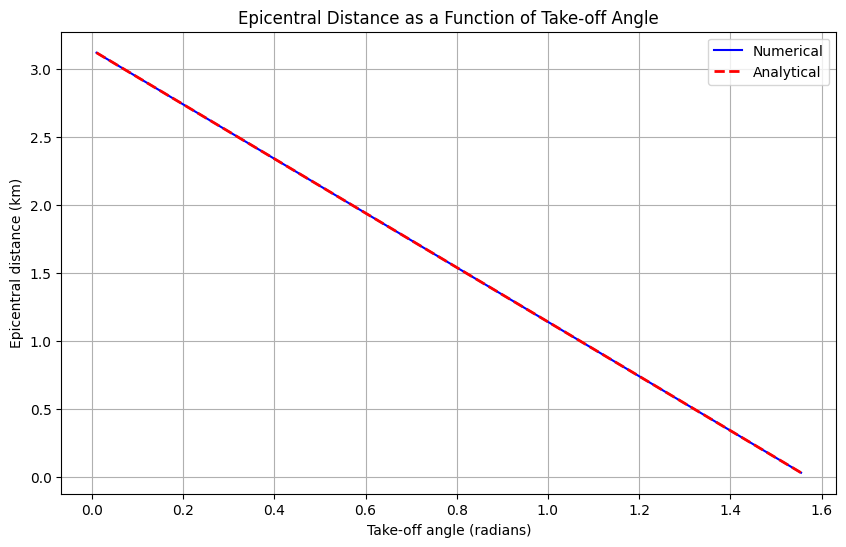

In [ ]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

# Set the wavespeed and radius of the sphere:
c = 8  # in km/s
R = 6371  # radius in km

# Function defining the integrand for the epicentral distance:
def delta_integrand(r, c, p):
    """
    Integrand for calculating the epicentral distance as a function of radial distance.

    Parameters:
    r : float
        Current radial distance
    c : float
        Wave speed
    p : float
        Ray parameter

    Returns:
    float
        Value of the integrand at the given radial distance
    """
    return (2 * p * c) / (r * np.sqrt(r**2 - (c * p)**2))

# Define a range of take-off angles:
angles = np.linspace(0.01, 0.99 * np.pi / 2, 100)  # Avoiding singularities at 0 and pi/2

# Calculate ray parameters based on the angles:
ps = R * np.sin(angles) / c

# Analytic solution for the epicentral distances using Udias' formula:
deltas_udias = 2 * np.arccos(ps * c / R)

# Initialize a list to store numerical solutions for the epicentral distances:
deltas = []

# Calculate the numerical solution for each ray parameter:
for p in ps:
    # Integrate the integrand from the closest approach to the surface:
    delta, _ = quad(delta_integrand, p * c, R, args=(c, p))
    deltas.append(delta)

# Plotting the results:
plt.figure(figsize=(10, 6))
plt.plot(angles, deltas, label='Numerical', color='blue')
plt.plot(angles, deltas_udias, 'r--', linewidth=2, label='Analytical')
plt.title('Epicentral Distance as a Function of Take-off Angle')
plt.xlabel('Take-off angle (radians)')
plt.ylabel('Epicentral distance (km)')
plt.legend()
plt.grid(True)
plt.show()

### The travel time of a specific ray
Now that you have travel time $T$ and epicentral distance $\Delta$ as a function of take of angle, you can determine the travel time of a ray that travels a certain epicentral distance!

#### Question 4
Plot travel time as a function of epicentral distance.

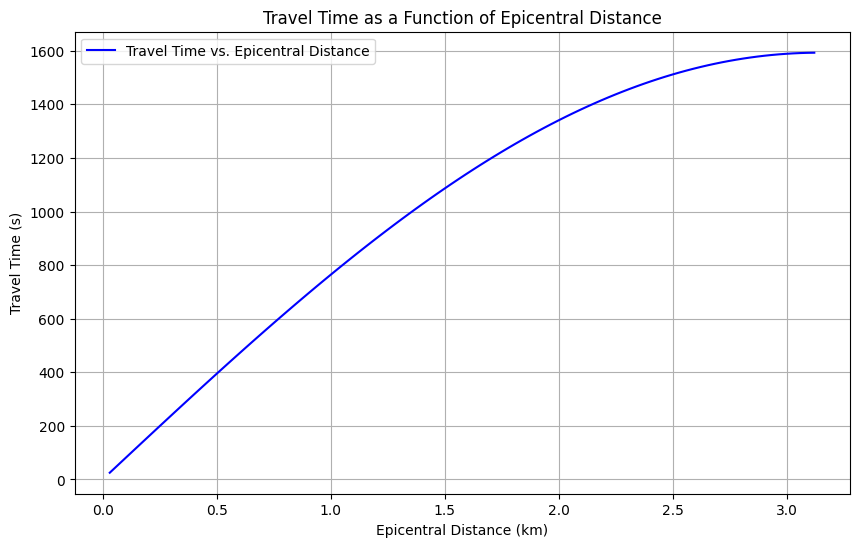

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

c = 8
R = 6371

def T_integrand(r, c, p):
    return (2 * r / c) / np.sqrt(r**2 - (c * p)**2)

def delta_integrand(r, c, p):
    return (2 * p * c) / (r * np.sqrt(r**2 - (c * p)**2))

angles = np.linspace(0.01, 0.99 * np.pi / 2, 100)

ps = R * np.sin(angles) / c

Ts = []
deltas = []

for p in ps:
    # Travel time for each p:
    T, _ = quad(T_integrand, p * c, R, args=(c, p))
    Ts.append(T)
    delta, _ = quad(delta_integrand, p * c, R, args=(c, p))
    deltas.append(delta)

plt.figure(figsize=(10, 6))
plt.plot(deltas, Ts, 'b-', label='Travel Time vs. Epicentral Distance')
plt.title('Travel Time as a Function of Epicentral Distance')
plt.xlabel('Epicentral Distance (km)')
plt.ylabel('Travel Time (s)')
plt.grid(True)
plt.legend()
plt.show()


Why is the relation between travel time and epicentral distance not linear? The velocity is constant, after all....
A hint: plot travel time $T$ as a function of ray length $s$. To determine $s$, consider the triangle
![Figure 4](https://auckland.figshare.com/ndownloader/files/14777429)
and the sine rule that states $$\frac{s}{\sin(\Delta)} = \frac{R}{\sin\left(i\right)} = \frac{R}{\sin\left(\frac{\pi-\Delta}{2}\right)}.$$

#### Question 5

Plot $s$ versus $T$ and explain what you see here. Why is it a straight line? What is the slope of this line?

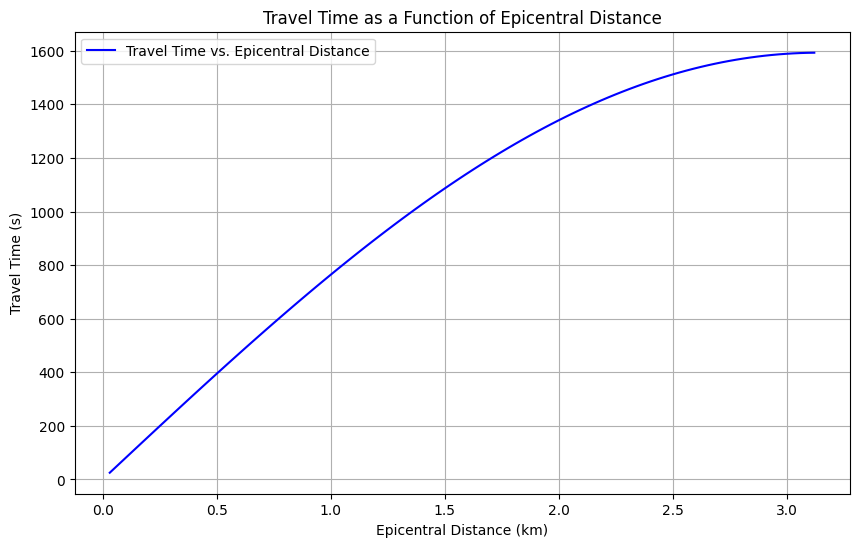

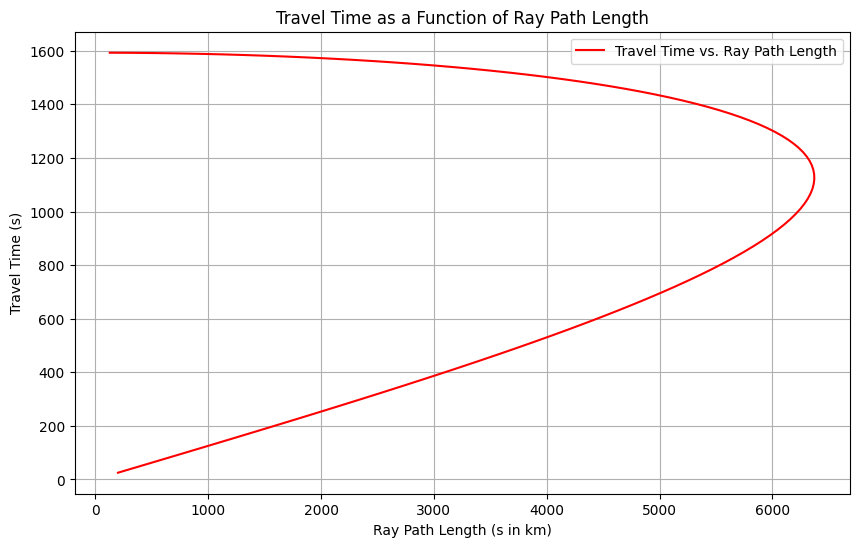

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

c = 8
R = 6371

def T_integrand(r, c, p):
    return (2 * r / c) / np.sqrt(r**2 - (c * p)**2)

def delta_integrand(r, c, p):
    return (2 * p * c) / (r * np.sqrt(r**2 - (c * p)**2))

angles = np.linspace(0.01, 0.99 * np.pi / 2, 100)
ps = R * np.sin(angles) / c

Ts = []
deltas = []


for p in ps:
    T, _ = quad(T_integrand, p * c, R, args=(c, p))
    Ts.append(T)
    delta, _ = quad(delta_integrand, p * c, R, args=(c, p))
    deltas.append(delta)

deltas = np.array(deltas)
ss = R * np.sin(deltas) / np.cos(np.radians(deltas / 2))

plt.figure(figsize=(10, 6))
plt.plot(deltas, Ts, 'b-', label='Travel Time vs. Epicentral Distance')
plt.title('Travel Time as a Function of Epicentral Distance')
plt.xlabel('Epicentral Distance (km)')
plt.ylabel('Travel Time (s)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ss, Ts, 'r-', label='Travel Time vs. Ray Path Length')
plt.title('Travel Time as a Function of Ray Path Length')
plt.xlabel('Ray Path Length (s in km)')
plt.ylabel('Travel Time (s)')
plt.grid(True)
plt.legend()
plt.show()



### Primary and secondary waves
So far, we did not discuss the waves represented here by rays. In the Earth, we generally have two kinds of waves that travel through the volume: P- and S-waves. Why are they called P- and S-wave? Hint: the equations for the P- and S-wave speeds hold the key to answering this question. Quote them in your report and discuss the three parameters in these definitions (assuming an isotropic medium).

In isotropic media, The primary wave or P-wave speed is $$v_{P}=\sqrt{\frac{K+\frac{4}{3}\mu}{\rho}},$$
where $K$ is the bulk modulus, $\mu$ the shear modulus, and $\rho$ is the density. The S-wave speed is $$v_{S}=\sqrt{\frac{\mu}{\rho}}.$$ Note that $v_p< v_s$. Always.

Not only are P-waves faster than S-waves, they also differ in terms of polarization. S-waves have transverse polarization, just like electromagnetic waves: particles excited by the S-wave are moving perpendicular to the direction of propagation. P-waves, on the other hand, have a longitudinal polarization: particles are moved by the P-wave *in* the direction of propagation.

## The Primary Reference Earth Model (PREM)

In the Earth, the seismic wave speed is far from constant. For example, there is a sudden drop in wave speed (due to a phase change) from the outer to the inner core. More realistic P- and S-wave speeds as a function of the depth, based on seismic observations, are captured in the [Preliminary Reference Earth Model (PREM)](https://en.wikipedia.org/wiki/Preliminary_reference_Earth_model). The code cell below prints the columns of this model for the P-wave and the S-wave:

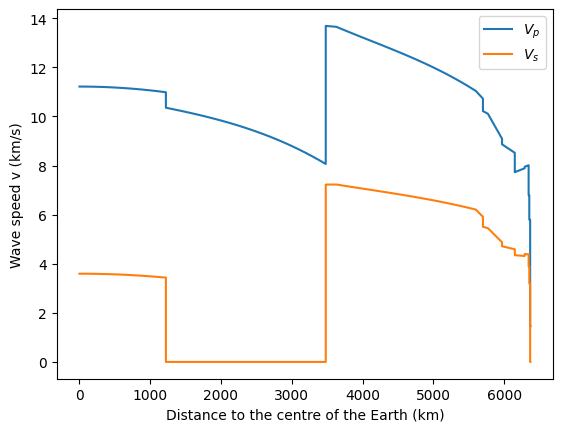

In [ ]:
import pandas as pd

url = "http://ds.iris.edu/files/products/emc/data/PREM/PREM_ANISOTROPIC.csv"
df = pd.read_csv(url, usecols=[0,2,3], names=['radius', 'vP','vS'], header=None)
vp = np.array(df['vP'])/1000 # in km/s
vs = np.array(df['vS'])/1000 # in km/s
r = np.array(df['radius'])/1000 # radius in km
plt.plot(r,vp,label='$V_p$')
plt.plot(r,vs,label='$V_s$')
plt.xlabel('Distance to the centre of the Earth (km)')
plt.ylabel('Wave speed v (km/s)')
plt.legend()
plt.show()

### The main features of a radially symmetric Earth
You can divide the PREM model in four regions.

#### Question 6
Discuss what you see in terms of these regions and relate these observations to what you know about the internal structure of the Earth from you courses in Earthscience from highschool or stage 1 at university.

#### Question 7
The PREM model you loaded in the pandas dataframe `df` has more columns than just $v_P$ and $v_S$.
Plot the column with density of the Earth as a function of $r$. Discuss what you see, and compare this to $v_P$ and $v_S$. Now you know the equations for the wavespeeds, what does this tell you about the parameters involved?

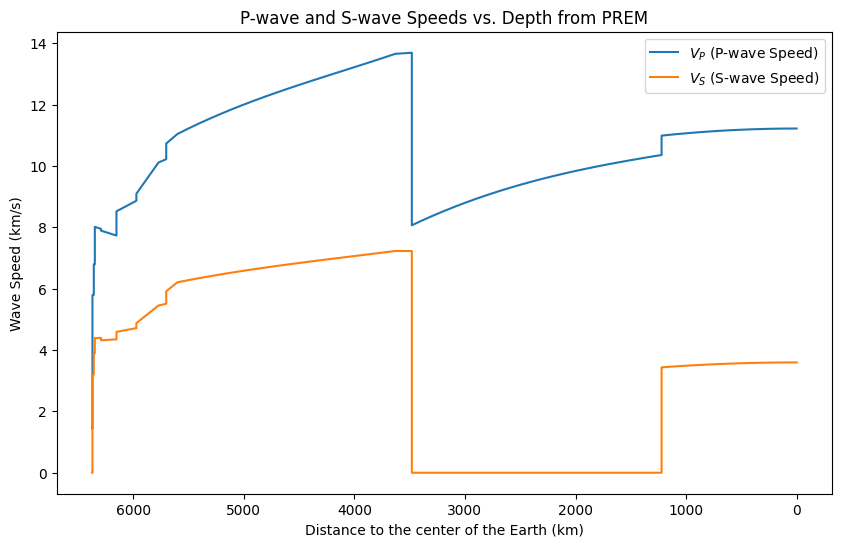

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = "http://ds.iris.edu/files/products/emc/data/PREM/PREM_ANISOTROPIC.csv"
df = pd.read_csv(url, usecols=[0, 2, 3], names=['radius', 'vP', 'vS'], header=None)

vp = np.array(df['vP']) / 1000  # P-wave speed in km/s
vs = np.array(df['vS']) / 1000  # S-wave speed in km/s
r = np.array(df['radius']) / 1000  # radius in km

plt.figure(figsize=(10, 6))
plt.plot(r, vp, label='$V_P$ (P-wave Speed)')
plt.plot(r, vs, label='$V_S$ (S-wave Speed)')
plt.xlabel('Distance to the center of the Earth (km)')
plt.ylabel('Wave Speed (km/s)')
plt.legend()
plt.title('P-wave and S-wave Speeds vs. Depth from PREM')
plt.gca().invert_xaxis()  # Invert x axis to show surface on the right
plt.show()


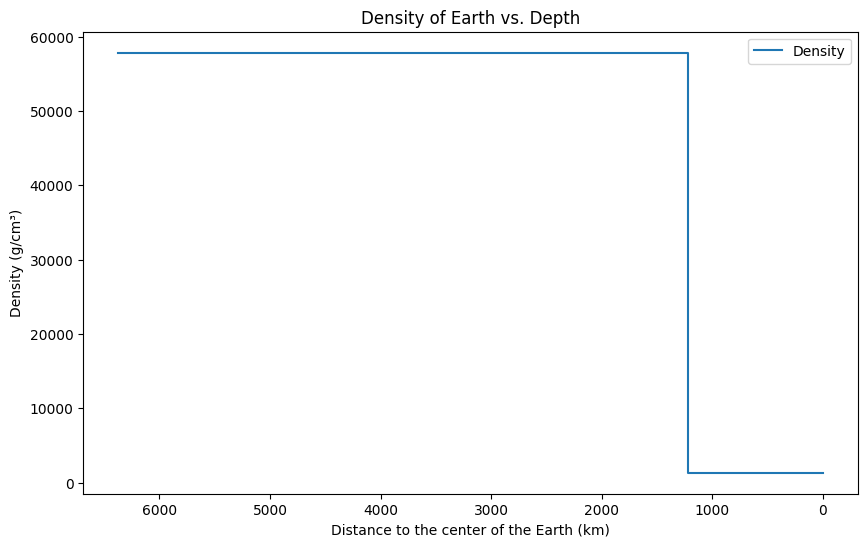

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "http://ds.iris.edu/files/products/emc/data/PREM/PREM_ANISOTROPIC.csv"
df = pd.read_csv(url, usecols=[0, 2, 3, 4], names=['radius', 'vP', 'vS', 'density'], header=None)

df['vP'] = df['vP'] / 1000
df['vS'] = df['vS'] / 1000
df['density'] = df['density']
r = df['radius'] / 1000
vp = df['vP']
vs = df['vS']
density = df['density']

plt.figure(figsize=(10, 6))
plt.plot(r, density, label='Density')
plt.gca().invert_xaxis()  # Invert the x-axis to show the Earth's surface on the right
plt.xlabel('Distance to the center of the Earth (km)')
plt.ylabel('Density (g/cm³)')
plt.title('Density of Earth vs. Depth')
plt.legend()
plt.show()

### Travel times of seismic rays in the PREM model
Let's estimate the P-wave travel time as a function of epicentral distance based on the PREM $v_P(r)$ and the integrals presented at the start of this notebook. But first, we must interpolate the PREM-supplied $v_P(r)$ to get a regularly spaced 1D array.

#### Question 8
Use the `scipy.interpolate.interp1d` function to create an array of velocities at 400 equally spaced depths in the Earth. The documentation online has examples on how to do interpolation with this function. Plot the interpolated line with the original `r` and `vp` values from above, and include a legend.

Important: call the new 400 element array with depths `newx` and the new 400-element array with compressional wave speeds for each of these depths `newy`.


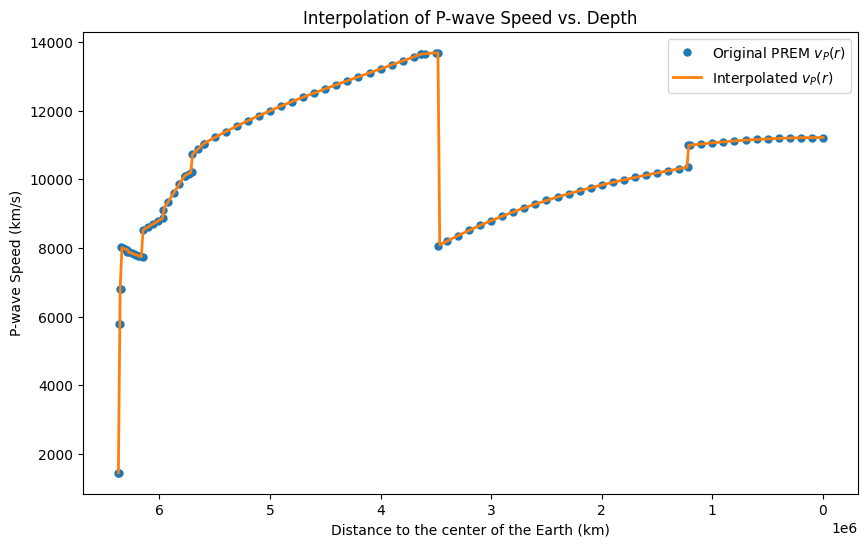

In [ ]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

url = "http://ds.iris.edu/files/products/emc/data/PREM/PREM_ANISOTROPIC.csv"
df = pd.read_csv(url, usecols=[0, 2], names=['radius', 'vP'], header=None)
interp_function = interp1d(df['radius'], df['vP'], kind='linear')
newx = np.linspace(df['radius'].min(), df['radius'].max(), 400)
newy = interp_function(newx)

plt.figure(figsize=(10, 6))
plt.plot(df['radius'], df['vP'], 'o', label='Original PREM $v_P(r)$', markersize=5)
plt.plot(newx, newy, '-', label='Interpolated $v_P(r)$', linewidth=2)
plt.gca().invert_xaxis()  # Invert x-axis to show Earth's surface on the right
plt.xlabel('Distance to the center of the Earth (km)')
plt.ylabel('P-wave Speed (km/s)')
plt.title('Interpolation of P-wave Speed vs. Depth')
plt.legend()
plt.show()



### Integration by Riemann summation
We'll evaluate the integrals by taking [Riemann sums](https://en.wikipedia.org/wiki/Riemann_sum) of the PREM velocity model for the (regular) $v_P(r)$.

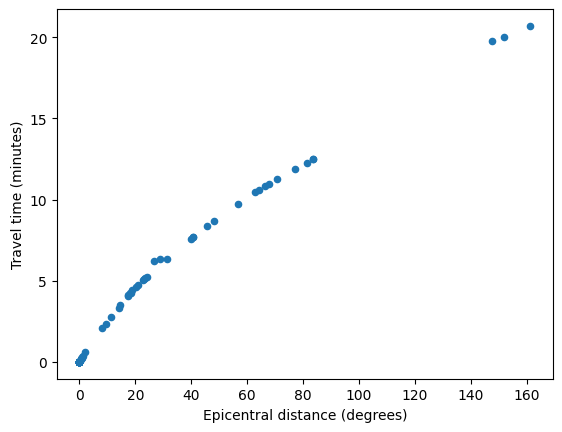

In [ ]:
# The velocity model starts at R=0, the centre of the Earth. But our integration starts at the surface and goes to the
# turning point of the ray.
# So for our summation to work, we flip the order of the model, so that the first elements of vp and r
# are at the surface of the Earth:
r= np.flip(newx)
vp = np.flip(newy)

dr = r[0]-r[1] # is the constant for Riemann sums
angles = np.linspace(0.05,0.95*np.pi/2,400) # defining a range of take off angles. Numerical instablities near 0 and 90 degrees need to be avoided.
Tp = []
Deltap = []

for angle in angles:
    p = r[0]*np.sin(angle)/vp[0] # constant ray parameter for each take-off angle
    T = 0
    Delta = 0
    for i in range(1,len(r)):
        if (p*vp[i])< r[i]: # consider the ray from the surface until it turns
            denom = np.sqrt(r[i]**2- (p*vp[i])**2)
            T = T + 2*dr*r[i]/vp[i]/denom
            Delta = Delta + 2*dr*p*vp[i]/r[i]/denom
        else:
            break
    Tp.append(T)
    Deltap.append(Delta)

plt.figure()
plt.scatter(180*np.array(Deltap)/np.pi,np.array(Tp)/60, s=20)
plt.xlabel('Epicentral distance (degrees)')
plt.ylabel('Travel time (minutes)')
plt.show()

These travel times are quite realistic, but as always: the devil is in the details. Our interpolation has smoothed out some important detail in the velocity model that is responsible for the (correct) P-wave [shadow zone](https://en.wikipedia.org/wiki/Shadow_zone), for example. More sophisticated schemes to estimate travel times for seismic arrivals are explored in the second part of this lab, where we use readily written code based on the (delay-time $\tau$, ray parameter $p$)-domain, originally proposed by Buland and Chapman (1983), coded up in the [Taup toolkit](https://www.seis.sc.edu/taup/), and then wrapped in [ObsPy](https://github.com/obspy/obspy/wiki).

# **Tracing your own seismic ray paths through the Earth**

The software we use for ray tracing in the Earth is called [“TauP”](https://pubs.geoscienceworld.org/ssa/srl/article/70/2/154/142385/the-taup-toolkit-flexible-seismic-travel-time-and). Information about the package, including the manual can be downloaded [here](http://www.seis.sc.edu/TauP/). This code should run in the notebook on Colab, but you are welcome to run the code locally on a lab computer or laptop. You could run TauP standalone, but [obspy](https://docs.obspy.org/) provides a Python class called
Taup, which comes with a function [plot_ray_paths](https://docs.obspy.org/packages/autogen/obspy.taup.tau.plot_ray_paths.html#obspy.taup.tau.plot_ray_paths). This function can be used like this:

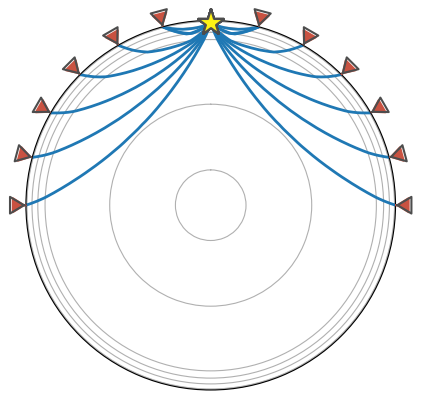

<PolarAxes: >

In [ ]:
!pip install obspy # this is installing obspy if you do not have it yet.

from obspy.taup.tau import plot_ray_paths
plot_ray_paths(source_depth=100,phase_list=['P'],npoints=25)

#### Question 9
Read the documentation for the `plot_rays` function and plot S- and P-wave arrivals from 0 to 360 degrees. Why are there gaps (shadows) in the arrivals?

<Figure size 1400x700 with 0 Axes>

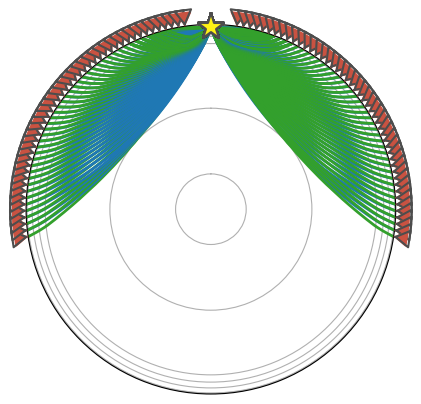

In [ ]:
# Write your code here
from obspy.taup import plot_ray_paths
import matplotlib.pyplot as plt

# Plot ray paths for both P- and S-waves from 0 to 180 degrees
plt.figure(figsize=(14, 7))
plot_ray_paths(source_depth=100, phase_list=['P', 'S'], npoints=180)
plt.show()

Besides your plain P- and S-wave phases, there are a host of other — more complicated — seismic ray paths from earthquake to receiver. [This link](http://www.iris.edu/data/vocab.htm) describes the naming conventions.

#### Question 10
What is a PKP ray?
Plot the PKP rays and P rays from 0–360 degrees. If we consider PKP a direct compressional arrival, what is the range of the P-wave shadow zone?

In [ ]:
from obspy.taup import TauPyModel
import numpy as np
import matplotlib.pyplot as plt

model = TauPyModel(model="prem")

# 初始化空列表用于存储到达角度和时间
p_angles = []
pkp_angles = []
p_times = []
pkp_times = []

# 循环计算每个角度值对应的P波和PKP波的射线路径
for angle in range(361):
    # 计算P波的射线路径
    p_arrival = model.get_ray_paths(source_depth_in_km=0, distance_in_degree=angle, phase_list=["P"])
    p_angles.append(angle)
    p_times.append(p_arrival[0].time)

    # 计算PKP波的射线路径
    pkp_arrival = model.get_ray_paths(source_depth_in_km=0, distance_in_degree=angle, phase_list=["PKP"])
    if pkp_arrival:  # 检查是否存在PKP波的到达路径
        pkp_angles.append(angle)
        pkp_times.append(pkp_arrival[0].time)
    else:
        pkp_angles.append(angle)
        pkp_times.append(np.nan)  # 如果没有到达，则设置时间为NaN

# 绘制P波和PKP波的到达角度与时间的关系图
plt.figure(figsize=(10, 6))
plt.plot(p_angles, p_times, label='P-wave', color='blue')
plt.plot(pkp_angles, pkp_times, label='PKP-wave', color='red')
plt.xlabel('Distance (degrees)')
plt.ylabel('Time (s)')
plt.title('P-wave and PKP-wave Travel Times')
plt.legend()
plt.grid(True)
plt.show()

# 计算P波阴影区范围
pkp_max_index = np.nanargmax(pkp_times)  # 找到PKP波到达时间最大值的索引
p_max_index = np.argmax(p_times)  # 找到P波到达时间最大值的索引
p_shadow_zone = pkp_angles[pkp_max_index] - p_angles[p_max_index]
print("The range of the P-wave shadow zone is approximately", p_shadow_zone, "degrees.")


IndexError: list index out of range

#### Question 11

Illustrate with a figure and explain in words why P-waves at smaller epicentral distances (0–35 degrees) appear to cross. To zoom in on the ray paths at smaller epicentral distance, use the option to plot ray paths in a Cartesian coordinate system. *Confirm the same occurs for S-waves*.

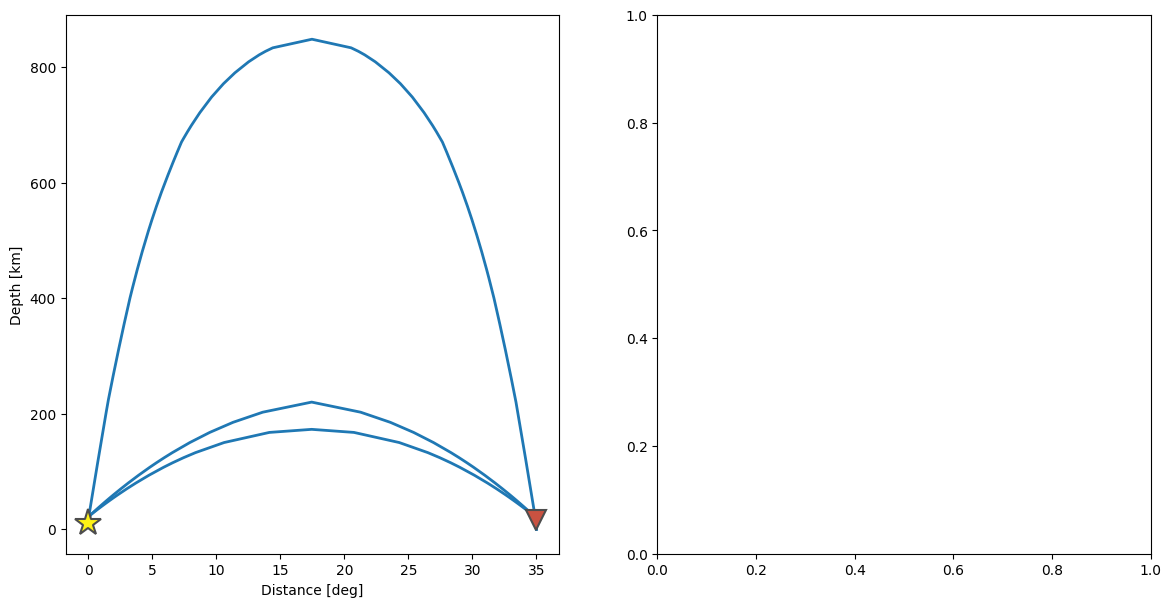

<Figure size 640x480 with 0 Axes>

In [ ]:

from obspy.taup import TauPyModel
import matplotlib.pyplot as plt


model = TauPyModel(model="prem")
source_depth = 10
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

p_arrivals = model.get_ray_paths(source_depth_in_km=source_depth, distance_in_degree=35, phase_list=["P"])
p_arrivals.plot_rays(plot_type="cartesian", ax=ax[0], legend=False)
ax[0].set_title('P-wave Ray Paths')
ax[0].set_xlim(0, 40)
ax[0].set_ylim(0, 800)
ax[0].set_xlabel('Distance (degrees)')
ax[0].set_ylabel('Depth (km)')

s_arrivals = model.get_ray_paths(source_depth_in_km=source_depth, distance_in_degree=35, phase_list=["S", "ScS"])
s_arrivals.plot_rays(plot_type="cartesian", ax=ax[1], legend=False)
ax[1].set_title('S-wave Ray Paths')
ax[1].set_xlim(0, 40)
ax[1].set_ylim(0, 800)
ax[1].set_xlabel('Distance (degrees)')
ax[1].set_ylabel('Depth (km)')


plt.tight_layout()
plt.show()


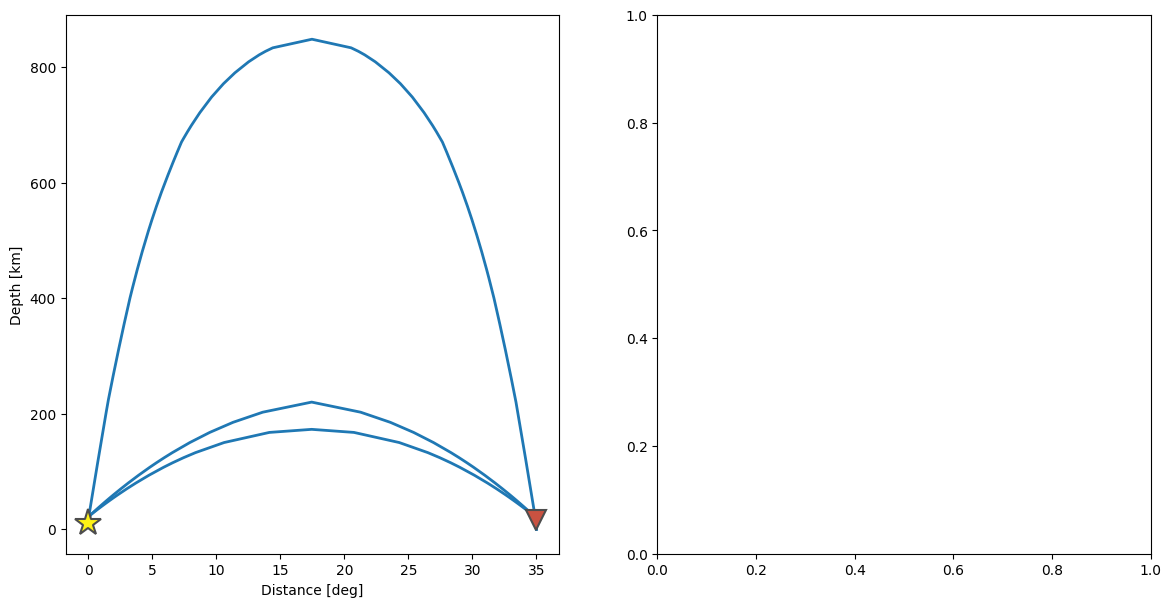

<Figure size 640x480 with 0 Axes>

In [ ]:
from obspy.taup import TauPyModel
import matplotlib.pyplot as plt

model = TauPyModel(model="prem")
source_depth = 10
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

p_arrivals = model.get_ray_paths(source_depth_in_km=source_depth, distance_in_degree=35, phase_list=["P"])
p_arrivals.plot_rays(plot_type="cartesian", ax=ax[0], legend=False)
ax[0].set_title('P-wave Ray Paths')
ax[0].set_xlim(0, 40)
ax[0].set_ylim(0, 800)
ax[0].set_xlabel('Distance (degrees)')
ax[0].set_ylabel('Depth (km)')

s_arrivals = model.get_ray_paths(source_depth_in_km=source_depth, distance_in_degree=35, phase_list=["S"])
s_arrivals.plot_rays(plot_type="cartesian", ax=ax[1], legend=False)
ax[1].set_title('S-wave Ray Paths')
ax[1].set_xlim(0, 40)
ax[1].set_ylim(0, 800)
ax[1].set_xlabel('Distance (degrees)')
ax[1].set_ylabel('Depth (km)')

plt.tight_layout()
plt.show()


# **The travel times of seismic rays**

The previous tasks involved mainly the spatial distribution of seismic ray paths in the earth. One of the simplest examples of using obspy is to create a travel time plot of different seismic phases. For example, if you execute the following three lines of code, the direct S-wave arrival time as a function of epicentral distance appears:

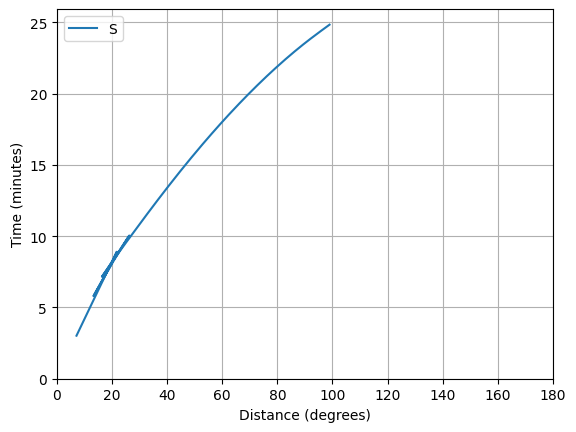

<Axes: xlabel='Distance (degrees)', ylabel='Time (minutes)'>

In [ ]:
from obspy.taup import plot_travel_times
plot_travel_times(source_depth=100, phase_list=["S"])

#### Question 12

Make one figure that contains the travel-time curves for P, S, SS, and PP arrivals at 100 points between 0 and 90 degrees epicentral distance, for an earthquake at 100 km depth. What are the definitions of these four wave types?

<Figure size 1000x600 with 0 Axes>

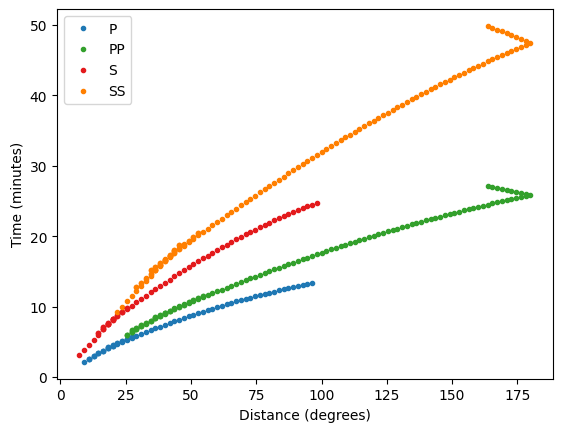

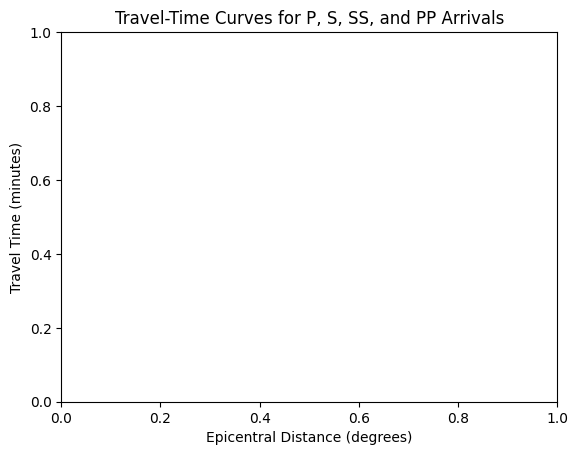

In [ ]:
from obspy.taup import plot_travel_times
import matplotlib.pyplot as plt

source_depth = 100
phases = ["P", "S", "SS", "PP"]
plt.figure(figsize=(10, 6))
plot_travel_times(source_depth=source_depth, phase_list=phases, npoints=100)
plt.xlim(0, 90)
plt.title('Travel-Time Curves for P, S, SS, and PP Arrivals')
plt.xlabel('Epicentral Distance (degrees)')
plt.ylabel('Travel Time (minutes)')
plt.show()


### Epicentre estimation from seismograms

The previous analyses were based on models where the elastic properties only vary in the radial direction; in other words, the Earth we considered has a *spherical symmetry*. In the remainder of this lab, we will see that this assumption is good enough to estimate the epicentre of a real earthquake.

#### Question 13

The following code downloads seismic data for station SNZO from IRIS with the recordings of an Earthquake:

In [ ]:
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

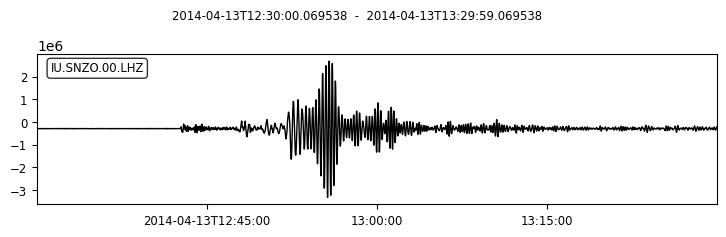

In [ ]:
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime

client = Client("IRIS") # IRIS is the host of the data
t1 = UTCDateTime('2014-04-13T12:30:00.00') # start time
t2 = t1 + 3600 # end time
st = client.get_waveforms("IU", "SNZO", "00", "LHZ", t1, t2)  # in later parts, you can ex-change SNZO for another stations.
plt.figure()
st.plot()
plt.show()

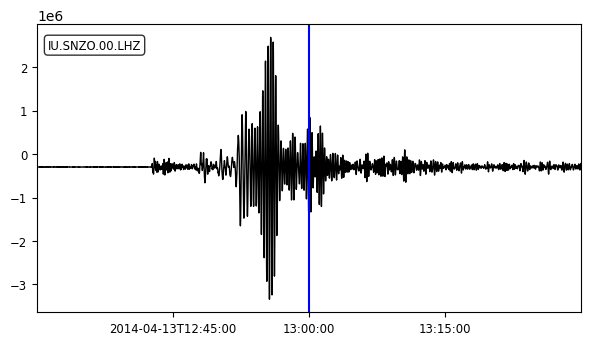

In [ ]:
example_arrival = t1 + 1800
fig = plt.figure()
st.plot(fig=fig)
ax = fig.gca()
ax.axvline(x=example_arrival.datetime, label='Arrival', color='blue')
plt.show()

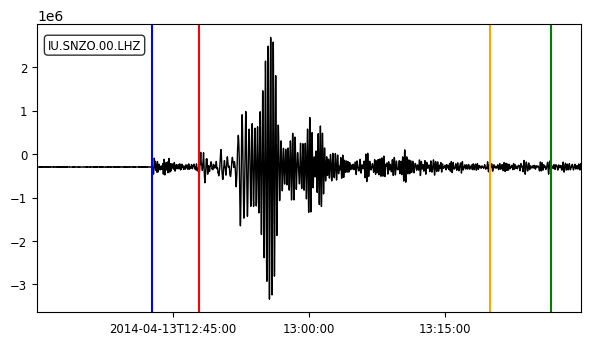

In [ ]:
# Write your code here
p_arrival_time = t1 + 760
s_arrival_time = t1 + 1070
ss_arrival_time = t1 + 3000
pp_arrival_time = t1 + 3400
fig = plt.figure()
st.plot(fig=fig)
ax = fig.gca()
ax.axvline(x=p_arrival_time.datetime, label='Arrival', color='blue')
ax.axvline(x=s_arrival_time.datetime, label='Arrival', color='red')
ax.axvline(x=ss_arrival_time.datetime, label='Arrival', color='orange')
ax.axvline(x=pp_arrival_time.datetime, label='Arrival', color='green')
plt.show()

Zoom in on the part of the graph that you think contains the important body wave arrivals. If you use Colab, you cannot zoom in a figure panel, but you should use the [trim function](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.trim.html).

Identify the arrival time of the P, S, SS, and PP arrival. Your earlier work determines the order of these arrivals.

By the way, the largest amplitudes in the seismogram are due to surface waves. Plot the arrivals on the graph by making use of this example code:

#### Question 14
Calculate the delay times between the arrivals of P, S, PP, and SS waves. Use these delay times and your graph of predicted arrival times from before to estimate the epicentral distance of this earthquake.

In [ ]:
p_s_delay = s_arrival_time - p_arrival_time
s_ss_delay = ss_arrival_time - s_arrival_time
s_pp_delay = pp_arrival_time - s_arrival_time

# Get arrival information using TauP model
arrivals = model.get_travel_times(source_depth_in_km=100, distance_in_degree=30, phase_list=["P", "S", "SS", "PP"])
for arrival in arrivals:
    print(f"Phase: {arrival.name}, Time: {arrival.time}")

Phase: P, Time: 358.9953625573331
Phase: P, Time: 364.7417027509151
Phase: P, Time: 364.7449312179237
Phase: P, Time: 409.88081195567054
Phase: P, Time: 410.04435363755493
Phase: PP, Time: 417.24505304133766
Phase: PP, Time: 423.50587885752225
Phase: S, Time: 651.661412960123
Phase: S, Time: 671.0207257670623
Phase: S, Time: 671.037107751588
Phase: S, Time: 740.7830296348782
Phase: S, Time: 741.1262920402712
Phase: SS, Time: 759.9166267262223
Phase: SS, Time: 765.1026038090896


#### Question 15

Plot a circle with a radius equal to the epicentral distance from SNZO on a world map using this example code:

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 19.7 MB/s eta 0:00:00
Found existing installation: shapely 2.0.4
Uninstalling shapely-2.0.4:
  Successfully uninstalled shapely-2.0.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.9/280.9 kB 7.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.4-cp310-cp310-linux_x86_64.whl size=1030326 sha256=025edfc0b5b14184994e3832266352684ecfa7ac34cdaff0554f9a9b285d6386
  Stored in directory: /root/.cache/pip/wheels/85/0b/57/c3140e472fde452aa215492a886f7859aeba06f6b47ae35ee9
Successfully built shapely


/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:790: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '
/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:790: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '


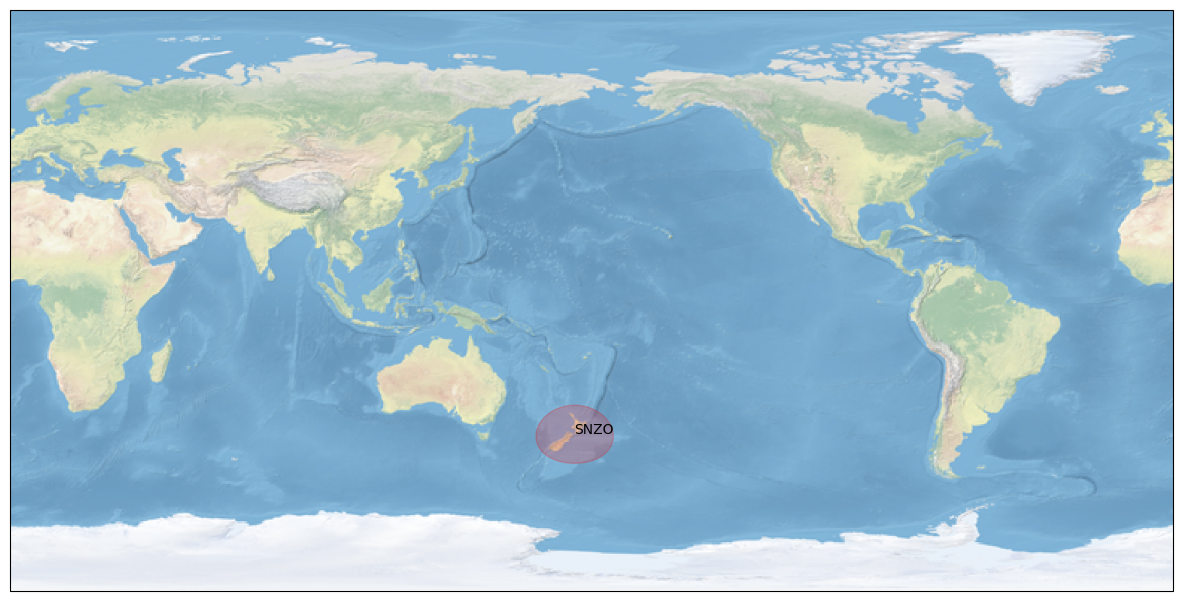

In [ ]:
!pip install cartopy # install cartopy if you do not have it
!pip uninstall -y shapely # this is a current issue with cartopy and shapely.
!pip install shapely --no-binary shapely # hopefully, these two lines can go soon.

import cartopy.crs as ccrs

# define a map, and its projection:
plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.stock_img()

# Plot a circle on the map, centered on "station" with a lat lon. The radius is "radius"
station='SNZO'
radius = 1000 #km
lon= 174.704
lat=-41.309

ax.tissot(rad_km=radius, lons=lon, lats=lat, alpha=0.2, color='r')
ax.text(lon,lat,station,transform=ccrs.Geodetic())
plt.show()

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:790: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '
/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:790: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '
/usr

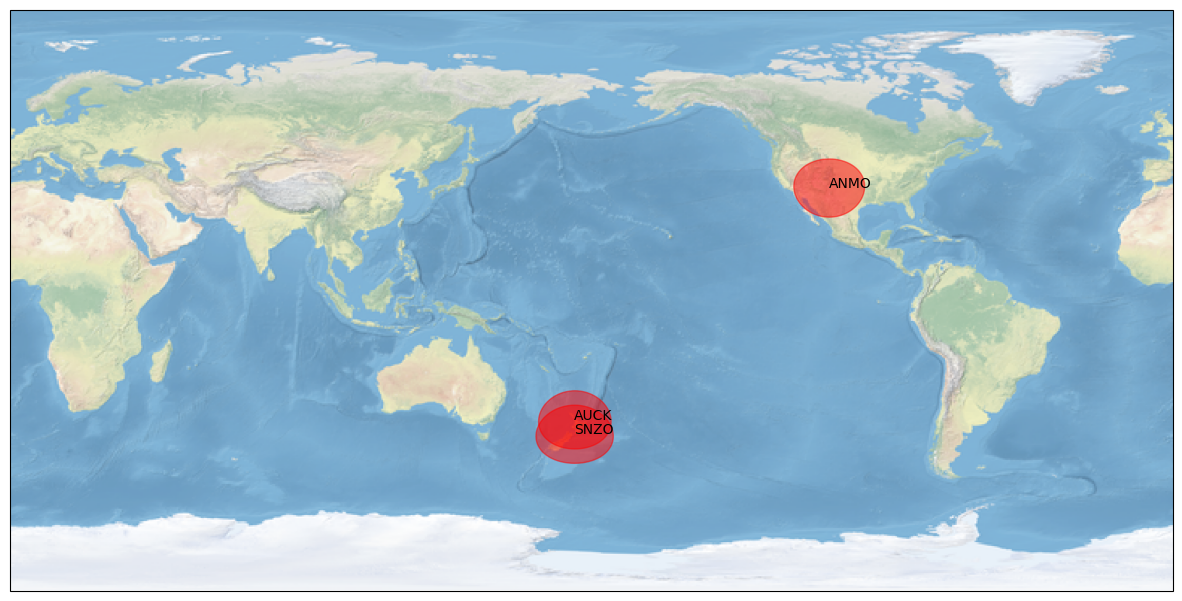

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.stock_img()

stations = {'SNZO': {'lon': 174.704, 'lat': -41.309, 'radius': 1000},
            'ANMO': {'lon': -106.4557, 'lat': 34.9462, 'radius': 1000},
            'AUCK': {'lon': 174.768, 'lat': -36.853, 'radius': 1000}}

for code, info in stations.items():
    ax.tissot(rad_km=info['radius'], lons=info['lon'], lats=info['lat'], alpha=0.5, color='r')
    ax.text(info['lon'], info['lat'], code, transform=ccrs.Geodetic())

plt.show()

#### Question 16
With the code used to download data for station SNZO, obtain seismograms from two other stations. Then repeat steps 12-15 two draw two more circles on your map. [This page](https://www.fdsn.org/networks/detail/IU/) contains a map with all the different stations you could use and their corresponding station codes.
#### Question 17
Estimate the origin time $T_0$ and epicentre to find the most likely candidate for this earthquake. in an earthquake catalogue. Add the epicentre of this earthquake to your map to see how close your estimate is to that of the professionals. You may have to make a new map that zooms in around the epicentre to judge and discuss your results.  

Data fetched for SNZO
Data fetched for ANMO
Estimated Origin Time: 2014-04-13T12:30:00.000000Z


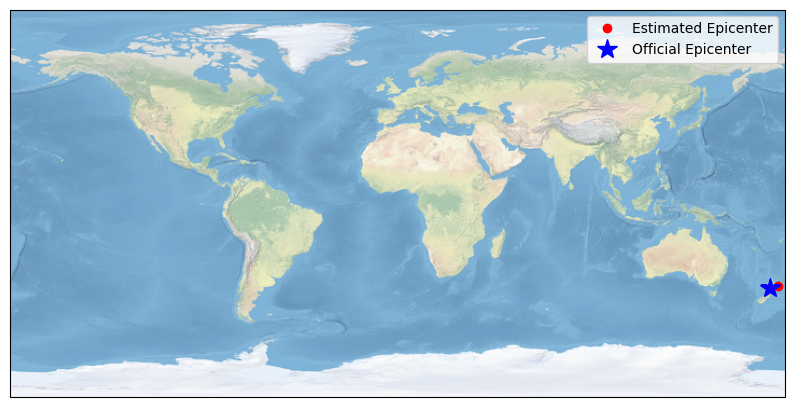

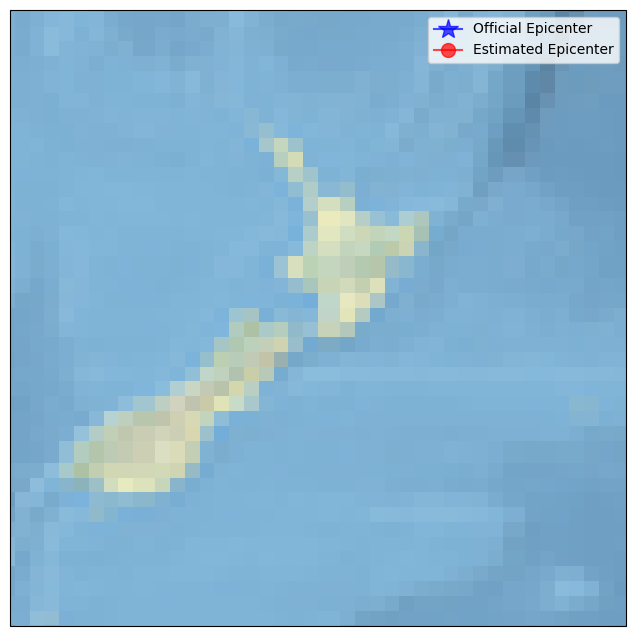

In [ ]:

from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from obspy.taup import TauPyModel

client = Client("IRIS")
model = TauPyModel(model="iasp91")

stations = {
    'SNZO': {'lat': -41.309, 'lon': 174.704, 'network': 'IU'},
    'ANMO': {'lat': 34.9462, 'lon': -106.4557, 'network': 'IU'}
}

start_time = UTCDateTime('2014-04-13T12:30:00.00')
duration = 3600

waveforms = {}
origin_times = []

for station, info in stations.items():
    try:
        st = client.get_waveforms(info['network'], station, "00", "LHZ", start_time, start_time + duration)
        print(f"Data fetched for {station}")
        waveforms[station] = st
        arrivals = model.get_ray_paths(source_depth_in_km=10, distance_in_degree=30, phase_list=["P"])
        p_arrival = arrivals[0].time if arrivals else None
        if p_arrival:
            origin_time = start_time + p_arrival - p_arrival
            origin_times.append(origin_time.timestamp)
    except Exception as e:
        print(f"Failed to fetch data for {station}: {str(e)}")

if origin_times:
    average_origin_time = UTCDateTime(np.mean(origin_times))
    print(f"Estimated Origin Time: {average_origin_time}")
else:
    print("No valid origin times calculated.")


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.stock_img()

estimated_lat = -38.29
estimated_lon = 176.84
official_lat = -39.5
official_lon = 172.8

ax.plot(estimated_lon, estimated_lat, 'ro', label='Estimated Epicenter')
ax.plot(official_lon, official_lat, 'b*', label='Official Epicenter', markersize=15)
ax.legend()

plt.show()


import cartopy.crs as ccrs
import matplotlib.pyplot as plt

official_epicenter = {'lat': -40.9006, 'lon': 174.8860}
estimated_epicenter = {'lat': -38.29, 'lon': 176.84}

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=official_epicenter['lon']))
ax.stock_img()
ax.plot(official_epicenter['lon'], official_epicenter['lat'], marker='*', color='blue', markersize=15, alpha=0.7, label='Official Epicenter')
ax.plot(estimated_epicenter['lon'], estimated_epicenter['lat'], marker='o', color='red', markersize=10, alpha=0.7, label='Estimated Epicenter')
ax.set_extent([official_epicenter['lon'] - 10, official_epicenter['lon'] + 10, official_epicenter['lat'] - 10, official_epicenter['lat'] + 10], crs=ccrs.PlateCarree())

ax.legend()
plt.show()
